# Analyzing Time Series Data

## Intialization

### Connect to Drive

In [24]:
# Use for normal projects
# In colab since I use that for other subjects as well I have partitioned it accordingly 
# But for my local drive I like to keep it simple
import os
import sys
from pathlib import Path
if 'google.colab' in str(get_ipython()):
  print('Running on Colab')
  from google.colab import drive
  drive.mount('/content/drive') 
  %pip install swifter -qq
  %pip install spotipy --upgrade -qq
  base_folder = Path('/content/drive/MyDrive/colab_notebooks/')
  subject = 'aml'
  data = base_folder/subject/'data/'
  archive = base_folder/subject/'archive/'
  output = base_folder/subject/'output'
  if not Path(base_folder/subject/'output').exists():
    os.makedirs(output,exist_ok=True)
  print(f'Base Folder is {base_folder}')
  print(f'Data Folder is {data}')
  print(f'Archive Folder is {archive}')
  print(f'Output Folder is {output}')
else:
  print('Not Running on Colab')
  # Add the path to the custom-functions directory in the local file system to sys.path
  sys.path.append('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/custom_functions')
  base_folder = Path('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA')
  data = base_folder/'data_sets'
  archive = base_folder/'archive'
  output = base_folder/'output'
  if not (base_folder/'output').exists():
    os.makedirs(output,exist_ok=True)
  print(f'Base Folder is {base_folder}')
  print(f'Data Folder is {data}')
  print(f'Archive Folder is {archive}')
  print(f'Output Folder is {output}')
  print(f'The path to the custom functions is {sys.path[-1]}')
  print(f'The working directory is {os.getcwd()}')

Not Running on Colab
Base Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA
Data Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\data_sets
Archive Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\archive
Output Folder is C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\output
The path to the custom functions is C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/custom_functions
The working directory is c:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\notebooks\Time_Series_Analysis


### Import Libraries

In [25]:
import numpy as np # to work with arrays and perform operations on it
import pandas as pd # to work with dataframes and perform operations on it
import matplotlib.pyplot as plt # to plot graphs
from datetime import datetime, timedelta # to work with datetime and perform operations on it 
import time # to work with time 

import swifter # to apply functions on pandas dataframe in parallel
import zipfile # to work with zip files

### Unzip data files

In [26]:
zips = [x for x in archive.iterdir() if 'zip' in x.name]
for entry in archive.iterdir():
  if 'zip' in entry.name:
    print(entry.name)

air_quality_data.zip
my_spotify_data.zip
my_spotify_data_2.zip
Spotify-20230303T164824Z-001.zip
stock_data.zip


#### Ozone Data

In [27]:
file = zips[0]

with zipfile.ZipFile(file,'r') as f:
  print(f.namelist())
  f.extractall(data)
  print('\n',f'Data was extracted to {data}')

['co_cities.csv', 'nyc.csv', 'ozone_nyc.csv', 'ozone_nyla.csv']

 Data was extracted to C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\data_sets


#### Stocks Data

In [28]:
file = zips[-1]

with zipfile.ZipFile(file,'r') as f:
  print(f.namelist())
  f.extractall(data)
  print('\n',f'Data was extracted to {data}')

['5_stocks.csv', 'apple_google.csv', 'asset_classes.csv', 'components.csv', 'debt_unemployment.csv', 'djia.csv', 'djia2.csv', 'dow_jones.csv', 'fb.csv', 'gdp_growth.csv', 'goog_fb.csv', 'google.csv', 'index.csv', 'listings.xlsx', 'market_cap_series.csv', 'msft_aapl.csv', 'nyse.csv', 'random_walk.csv', 'sp500.csv', 'stock_data.csv', 'stocks_4.csv', 'tickers.csv', 'unrate.csv', 'unrate_2000.csv', 'yahoo.csv']

 Data was extracted to C:\Users\Abdul Rauf Maroof\OneDrive\Documents\MSBA\data_sets


## Data Preprocessing

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


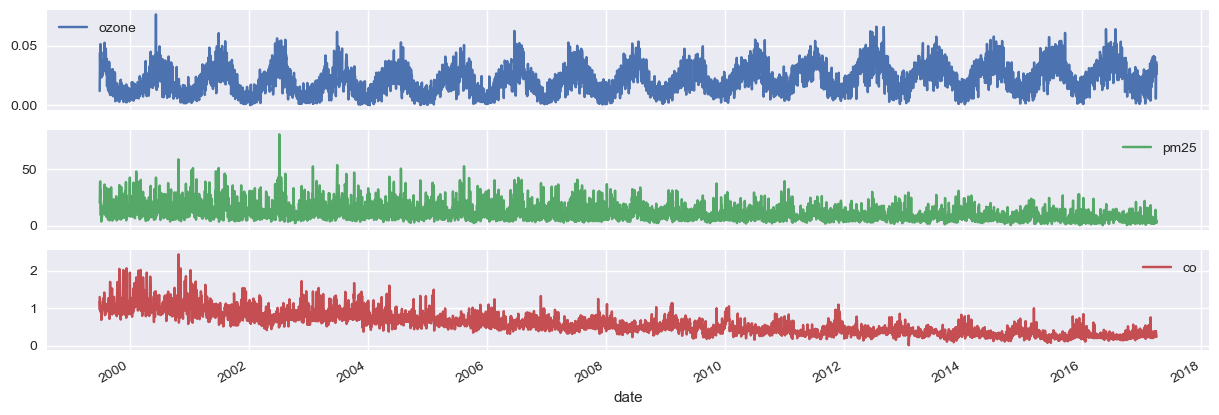

In [47]:
# Read data from csv file
# In the case of date column we need to parse it as a date
# We also need to set the date column as the index ideally when we are performing time series analysis
nyc_df = pd.read_csv(data/'nyc.csv',parse_dates=['date'],index_col='date')
print(nyc_df.info())

# Plot the data
nyc_df.plot(subplots= True, figsize=(15,5))
plt.show()

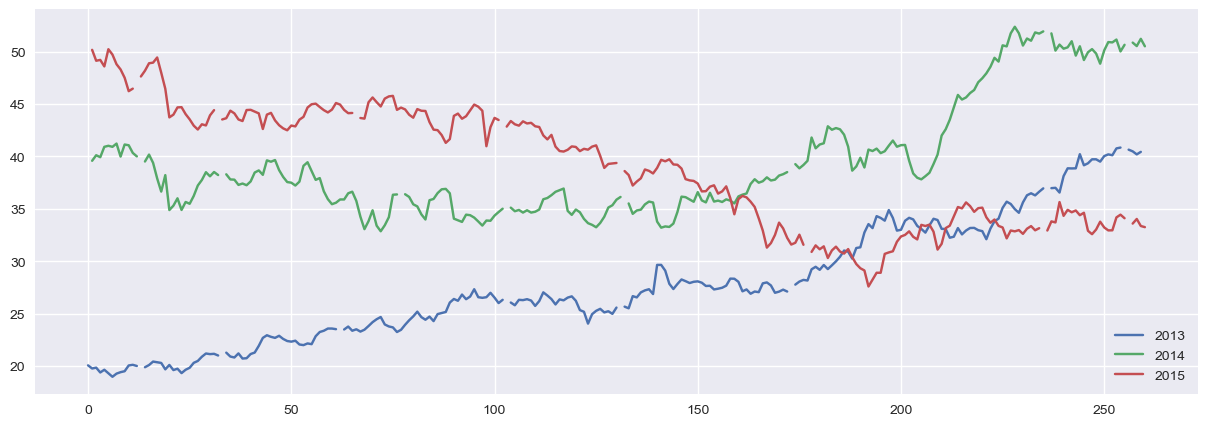

In [76]:
# import yahoo data
yahoo = pd.read_csv(data/'yahoo.csv',parse_dates=['date'],index_col='date')

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot(figsize=(15,5))
plt.show()


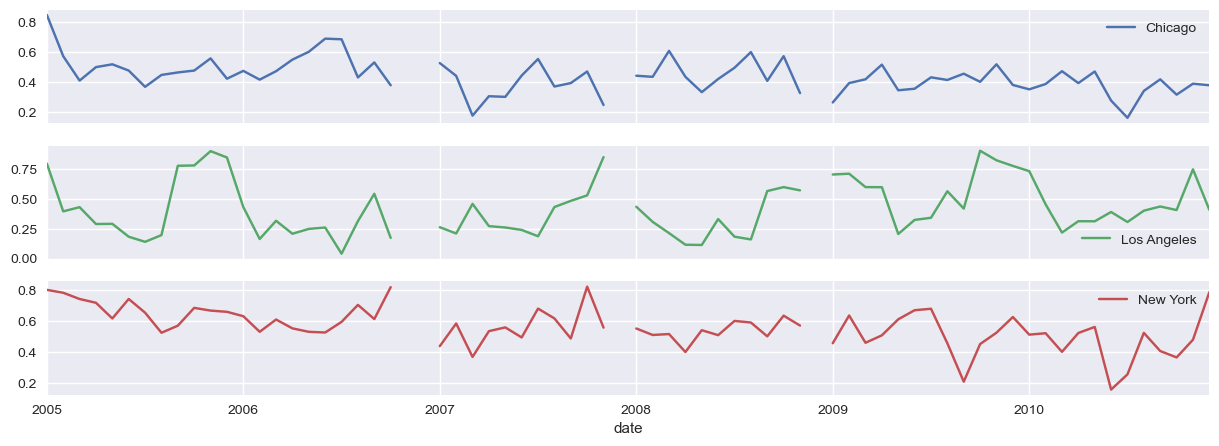

In [55]:
# Load co_cities dataset
co_cities = pd.read_csv(data/'co_cities.csv',parse_dates=['date'],index_col='date')

# Use different frequency for each city
co_cities = co_cities.asfreq('M')
co_cities.plot(subplots=True, figsize=(15, 5))
plt.show()

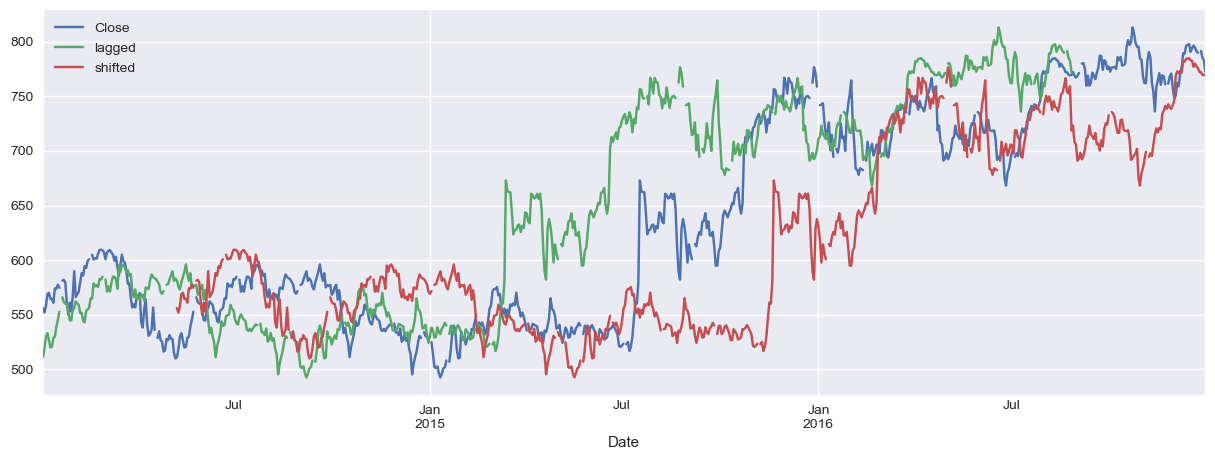

In [74]:
# Shift is an inbuilt function in pandas
# It shifts the data by the number of periods specified
# It is a time series function

# Import data here
google = pd.read_csv(data/'google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(-90)
google['shifted'] = google.Close.shift(90)

# Plot the google price series
google.plot(figsize=(15, 5))
plt.show()

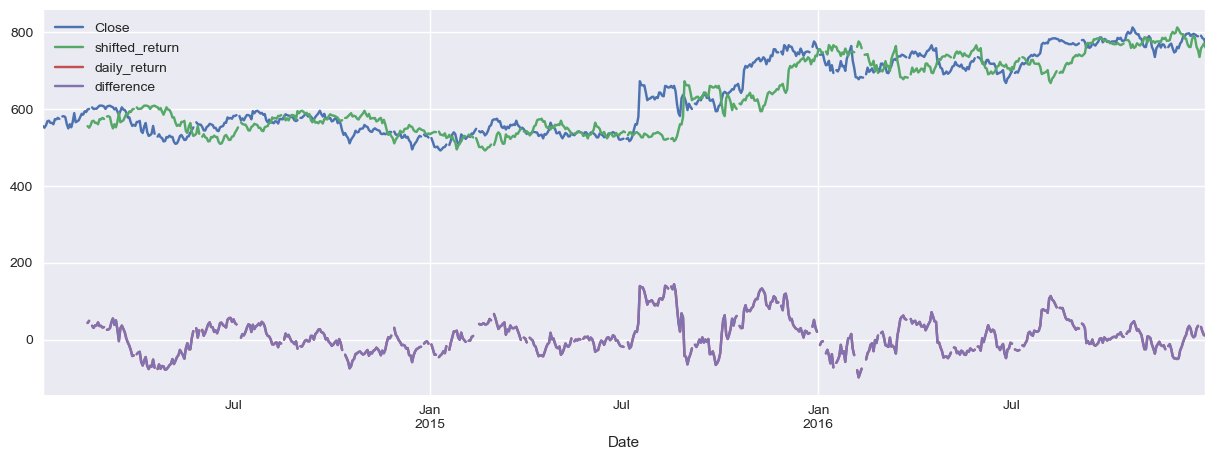

In [86]:
# Another use of the shift function is to calculate the percentage change in the data
# This is a very common operation in time series analysis
# We can use the shift function to calculate the percentage change in the data

# Import data here
google = pd.read_csv(data/'google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create shifted_return
google['shifted_return'] = google.Close.shift(30)

# Create daily_return
google['daily_return'] = google.Close - google.shifted_return

# The diff() function is used to calculate the difference between the current value and the previous value
# same as the manual calculation we did above
google['difference'] = google.Close.diff(30)
google[['Close','shifted_return','difference','daily_return']]

# Plot the google price series
google.plot(figsize=(15,5))
plt.show()


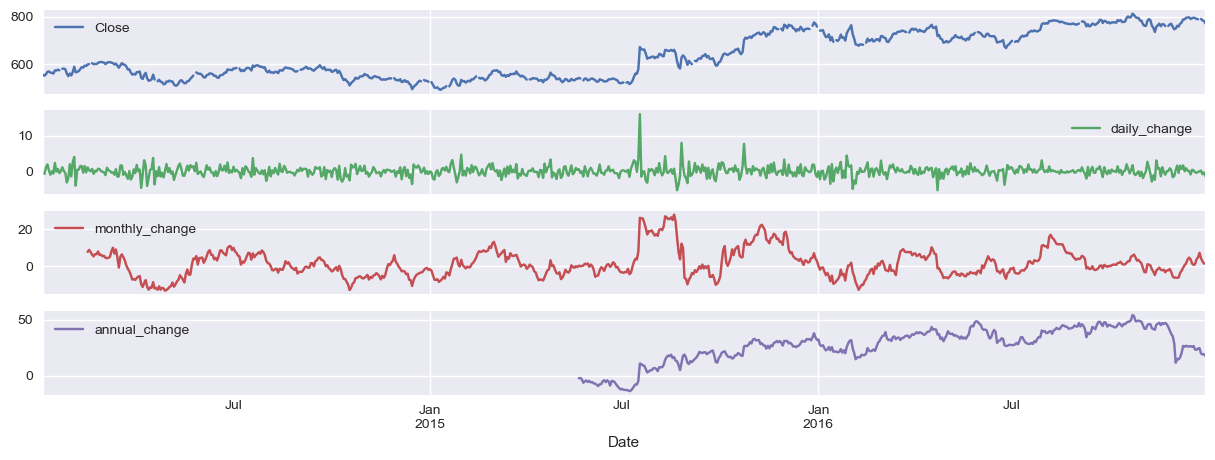

In [92]:
# Another useful function in pandas is pct_change()
# It calculates the percentage change in the data

# Import data here
google = pd.read_csv(data/'google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# # Create pct_change
google['daily_change'] = google.Close.pct_change(1) * 100
google['monthly_change'] = google.Close.pct_change(30) * 100
google['annual_change'] = google.Close.pct_change(360) * 100

# # Plot google price series
google.plot(subplots=True, figsize=(15, 5))
plt.show()



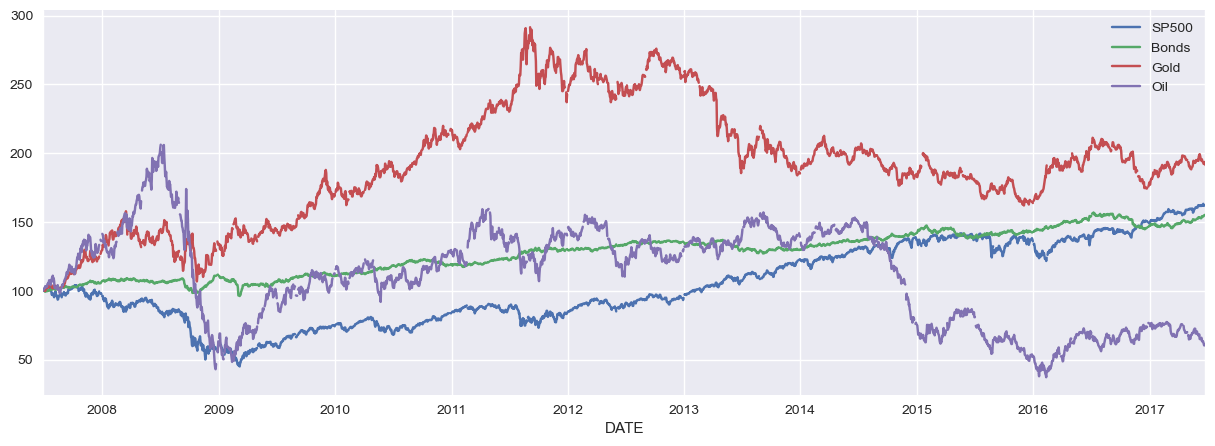

In [99]:
# Another useful concept to understand is the concept of normalization
# Normalization is the process of converting the data to a common scale
# This is done to make the data comparable
# Normalization is done by dividing the data by the first value in the series
# This is called the normalization constant
# The normalized data is then multiplied by 100 to convert it to a percentage

# Import data here
prices = pd.read_csv(data/'asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Set data frequency to business daily
prices = prices.asfreq('B')

# Calculate the normalization constant
normalization_constant = prices.iloc[0]

# Normalize the data
# Intersetingly the pandas library has a div() function which is used to divide the data by a constant
# Similarly it has a mul() function which is used to multiply the data by a constant
# There are math functions like add(), sub() etc which can be used to perform mathematical operations on the data
normalized = prices.div(normalization_constant).mul(100)

# Plot the normalized data
normalized.plot(figsize=(15, 5))
plt.show()

# This makes it easier to compare the data
# We can see that the data is now comparable


In [107]:
# When use asfreq() function to resample the data we typically end up with missing values

# Import data here
google = pd.read_csv(data/'google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('M'); display(google.head())
print('\n')
google = google.asfreq('B'); display(google.head())


,Close
Date,
2014-01-31,589.89
2014-02-28,607.22
2014-03-31,556.70
2014-04-30,526.66
2014-05-31,NaN


,Close
Date,
2014-01-31,589.89
2014-02-03,NaN
2014-02-04,NaN
2014-02-05,NaN
2014-02-06,NaN
